In [2]:
from keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
classes = ['Test1', 'Test2', 'Test3', 'Test4', 'Test5']

In [30]:
shape = (572, 572, 3)

noise = 0.1

In [32]:
x = tf.keras.layers.Input(shape=shape); y=x                                    # 572x572x3
y = tf.keras.layers.GaussianNoise(noise)(y)                                      # 572x572x3
y = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='valid')(y)  # 570x570x64
y = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='valid')(y)  # 568x568x64
skip1 = y                                                                      # 568x568x64
y = tf.keras.layers.MaxPooling2D(2)(y)                                         # 284x284x64
y = tf.keras.layers.Conv2D(128, 3, activation='relu')(y)                       # 282x282x128
y = tf.keras.layers.Conv2D(128, 3, activation='relu')(y)                       # 280x280x128
skip2 = y                                                                      # 280x280x128
y = tf.keras.layers.MaxPooling2D(2)(y)                                         # 140x140x128
y = tf.keras.layers.Conv2D(256, 3, activation='relu')(y)                       # 138x138x256
y = tf.keras.layers.Conv2D(256, 3, activation='relu')(y)                       # 136x136x256
skip3 = y                                                                      # 136x136x256
y = tf.keras.layers.MaxPooling2D(2)(y)                                         # 68x68x256
y = tf.keras.layers.Conv2D(512, 3, activation='relu')(y)                       # 66x66x512
y = tf.keras.layers.Conv2D(512, 3, activation='relu')(y)                       # 64x64x512
skip4 = y                                                                      # 64x64x512
y = tf.keras.layers.MaxPooling2D(2)(y)                                         # 32x32x512   
y = tf.keras.layers.Conv2D(1024, 3, activation='relu')(y)                      # 30x30x1024
y = tf.keras.layers.Conv2D(1024, 3, activation='relu')(y)                      # 28x28x1024
y = tf.keras.layers.Conv2DTranspose(512, 2, strides=2, activation='relu')(y)   # 56x56x512
skip4 = tf.keras.layers.Cropping2D(cropping=((4,4),(4,4)))(skip4)              # 56x56x512
y = tf.keras.layers.Add()([y, skip4])
y = tf.keras.layers.Conv2D(512, 3, activation='relu')(y)                       # 54x54x512
y = tf.keras.layers.Conv2D(512, 3, activation='relu')(y)                       # 52x52x512
y = tf.keras.layers.Conv2DTranspose(256, 2, strides=2, activation='relu')(y)   # 104x104x256
skip3 = tf.keras.layers.Cropping2D(cropping=((16,16),(16,16)))(skip3)          # 104x104x256
y = tf.keras.layers.Add()([y, skip3])
y = tf.keras.layers.Conv2D(256, 3, activation='relu')(y)                       # 102x102x256
y = tf.keras.layers.Conv2D(256, 3, activation='relu')(y)                       # 100x100x256
y = tf.keras.layers.Conv2DTranspose(128, 2, strides=2, activation='relu')(y)   # 200x200x128
skip2 = tf.keras.layers.Cropping2D(cropping=((40,40),(40,40)))(skip2)          # 200x200x128
y = tf.keras.layers.Add()([y, skip2])
y = tf.keras.layers.Conv2D(128, 3, activation='relu')(y)                       # 198x198x128
y = tf.keras.layers.Conv2D(128, 3, activation='relu')(y)                       # 196x196x128
y = tf.keras.layers.Conv2DTranspose(64, 2, strides=2, activation='relu')(y)    # 392x392x64
skip1 = tf.keras.layers.Cropping2D(cropping=((88,88),(88,88)))(skip1)          # 392x392x64
y = tf.keras.layers.Add()([y, skip1])
y = tf.keras.layers.Conv2D(64, 3, activation='relu')(y)                        # 390x390x64
y = tf.keras.layers.Conv2D(64, 3, activation='relu')(y)                        # 388x388x64
y = tf.keras.layers.Conv2D(3, 1, activation='sigmoid')(y)                      # 388x388x3
model = Model(inputs=x, outputs=y)

In [33]:
epochs = 10
batch_size = 1

In [29]:
x_train = np.random.randint(0, 255, (100, 572, 572, 3))
x_test = np.random.randint(0, 255, (100, 572, 572, 3))
y_train = np.random.randint(0, 255, (100, 388, 388, 3))
y_test = np.random.randint(0, 255, (100, 388, 388, 3))

x_train = x_train / 255
x_test = x_test / 255
y_train = y_train / 255
y_test = y_test / 255

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=[tf.keras.losses.mse, tf.keras.losses.categorical_crossentropy])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

  2/100 [..............................] - ETA: 5:57 - loss: 0.0840 

KeyboardInterrupt: 

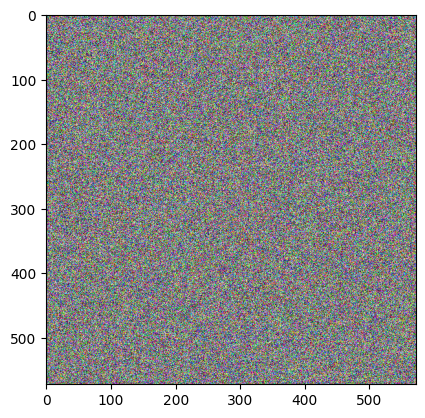

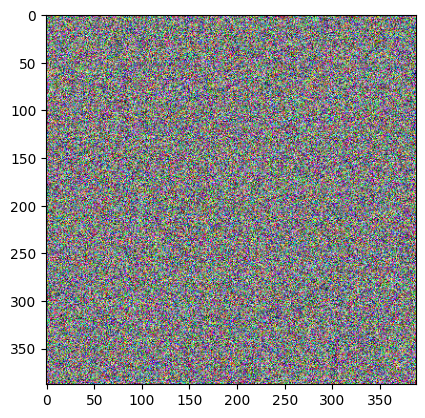

In [30]:
image = x_test.squeeze()
plt.imshow(image)
plt.show()
image = y_test.squeeze()
plt.imshow(image)
plt.show()

1/1 [==============================] - 1s 816ms/step


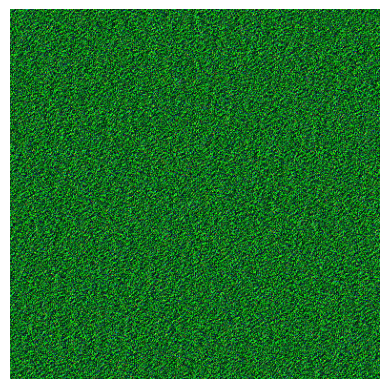

In [11]:
image = np.random.randint(0, 255, (1, 572, 572, 3))
image = model.predict(image)
image = image.squeeze()
plt.imshow(image)
plt.axis('off')
plt.show()

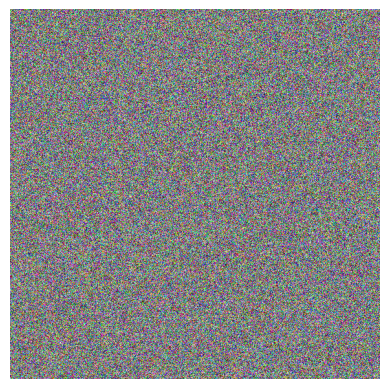

In [23]:
test = tf.random.uniform(shape=shape, minval=0, maxval=255, dtype=tf.int32)
plt.imshow(test)
plt.axis('off')
plt.show()